In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import concatenate, MaxPooling2D,Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Data Preprocessing

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model

In [7]:
def inception_module(input_data, filters):
    
    # 1x1 Convolution
    conv1x1_1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(input_data)

    # 1x1 Convolution followed by 3x3 Convolution
    conv1x1_2 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(input_data)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv1x1_2)

    # 1x1 Convolution followed by 5x5 Convolution
    conv1x1_3 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(input_data)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv1x1_3)

    # 3x3 MaxPooling followed by 1x1 Convolution
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_data)
    conv1x1_4 = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)

    # Concatenate all branches
    inception = concatenate([conv1x1_1, conv3x3, conv5x5, conv1x1_4], axis=-1)
    return inception

In [8]:
# Building the model

input_layer = Input(shape=(32, 32, 3))

# Inception Module
x = inception_module(input_layer, [64, 128, 128, 32, 32, 32])

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Output layer
output_layer = Dense(10, activation='softmax')(x)

# Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 128)  512         ['input_1[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 32, 32, 32)   128         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                              

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 508s 324ms/step - loss: 2.0194 - accuracy: 0.2440
Epoch 2/10
1563/1563 [==============================] - 526s 336ms/step - loss: 1.8815 - accuracy: 0.3066
Epoch 3/10
1563/1563 [==============================] - 544s 348ms/step - loss: 1.7570 - accuracy: 0.3544
Epoch 4/10
1563/1563 [==============================] - 562s 359ms/step - loss: 1.6730 - accuracy: 0.3847
Epoch 5/10
1563/1563 [==============================] - 491s 314ms/step - loss: 1.6280 - accuracy: 0.4067
Epoch 6/10
1563/1563 [==============================] - 492s 315ms/step - loss: 1.5952 - accuracy: 0.4208
Epoch 7/10
1563/1563 [==============================] - 488s 312ms/step - loss: 1.5658 - accuracy: 0.4334
Epoch 8/10
1563/1563 [==============================] - 487s 312ms/step - loss: 1.5350 - accuracy: 0.4459
Epoch 9/10
1563/1563 [==============================] - 488s 312ms/step - loss: 1.5061 - accuracy: 0.4579
Epoch 10/10
1563/1563 [=======================

## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1),labels=list(np.arange(0,10)))

313/313 [==============================] - 34s 107ms/step


Text(0.5, 51.0, 'Predicted label')

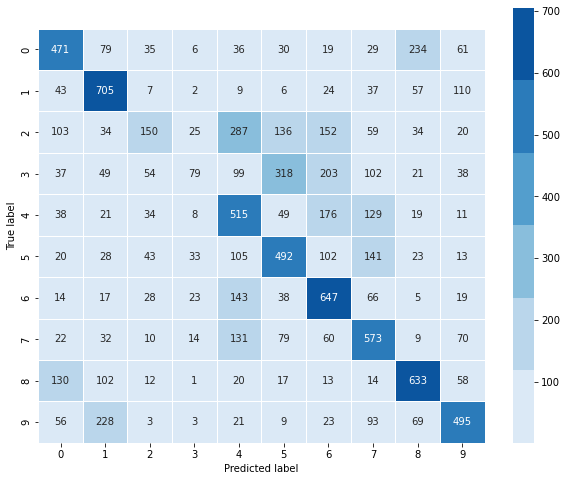

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Precision, Recall, F1-score

In [13]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1), target_names=target_names))

313/313 [==============================] - 33s 105ms/step
              precision    recall  f1-score   support

     Class 0       0.50      0.47      0.49      1000
     Class 1       0.54      0.70      0.61      1000
     Class 2       0.40      0.15      0.22      1000
     Class 3       0.41      0.08      0.13      1000
     Class 4       0.38      0.52      0.44      1000
     Class 5       0.42      0.49      0.45      1000
     Class 6       0.46      0.65      0.53      1000
     Class 7       0.46      0.57      0.51      1000
     Class 8       0.57      0.63      0.60      1000
     Class 9       0.55      0.49      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.45     10000
weighted avg       0.47      0.48      0.45     10000

